## This notebook is only used for image predictions 

> For video predictions please go [here](https://vision-api.streamlit.app/)

In [54]:
import tensorflow as tf
from yolo.predictions import prediction
from yolo.utils.tools import read_classes, read_anchors
from yolo.utils.tools import preprocess_image
from model_body.url import url_img_read
import logging
import pandas as pd 
from skimage.transform import resize
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

#### Image Path here

In [32]:
path = "https://www.augsburger-allgemeine.de/img/augsburg/crop34383812/9746561859-cv16_9-w1880/WYS4865.jpg"

#### Image Process Here

In [33]:
online_image = True
yolo_shape   = (608, 608)

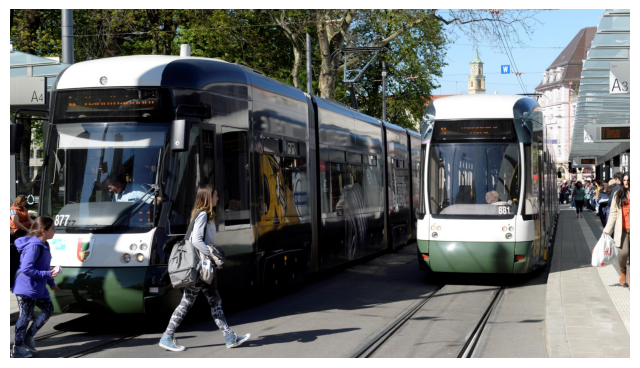

In [34]:
if online_image:
    image = url_img_read(path, show=True)
    image, image_data, shape = preprocess_image(img_path=image, model_image_size = yolo_shape, done=True)
else:
    image, image_data, shape = preprocess_image(img_path=path, model_image_size = yolo_shape, done=False)


#### Loading yoyo model

In [35]:
tf.get_logger().setLevel(logging.ERROR)

In [36]:
yolo_model = tf.keras.models.load_model('./yolo_model/')

C:\Users\amib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\lambda_layer.py:327: UserWarning: yad2k.models.keras_yolo is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


#### Reading all classes and anchors

In [37]:
Class_names         = read_classes()
anchors             = read_anchors()

#### Hyper Parameters. You can change them

In [38]:
classes         = []
max_boxes       = 10
class_names     = []
score_threshold = 0.3
iou_threshold   = 0.2
response        = False
file_type       = 'image'
df              = {'label' : [], 'score':[], 'top':[], "left":[], "bottom":[], 'right':[]}

#### Do not change this part of notebook.

In [39]:
if class_names: pass 
else: class_names = Class_names.copy()

kwargs = {
    "class_names"       : Class_names, 
    'image_file'        : [(image, image_data)],
    "Class_names"       : Class_names,
    "max_boxes"         : max_boxes,
    "score_threshold"   : score_threshold,
    "iou_threshold"     : iou_threshold,
    "anchors"           : anchors
}

#### Image prediction. Do not change anything here also.

In [40]:
image_predicted = prediction(
            yolo_model      = yolo_model, 
            use_classes     = kwargs['class_names'],
            image_file      = kwargs['image_file'], 
            anchors         = kwargs['anchors'], 
            class_names     = kwargs['Class_names'], 
            img_size        = yolo_shape,
            max_boxes       = kwargs['max_boxes'], 
            score_threshold = kwargs['score_threshold'], 
            iou_threshold   = kwargs['iou_threshold'], 
            data_dict       = df,
            shape           = shape, 
            file_type       = 'image', 
            with_score      = response
            )

#### Resizing images 

In [47]:
imgs = [ resize(image_data.reshape(yolo_shape+(3,)), output_shape=shape), image_predicted]
img_classes = ['True Label', 'Predicted Label']

#### Results 

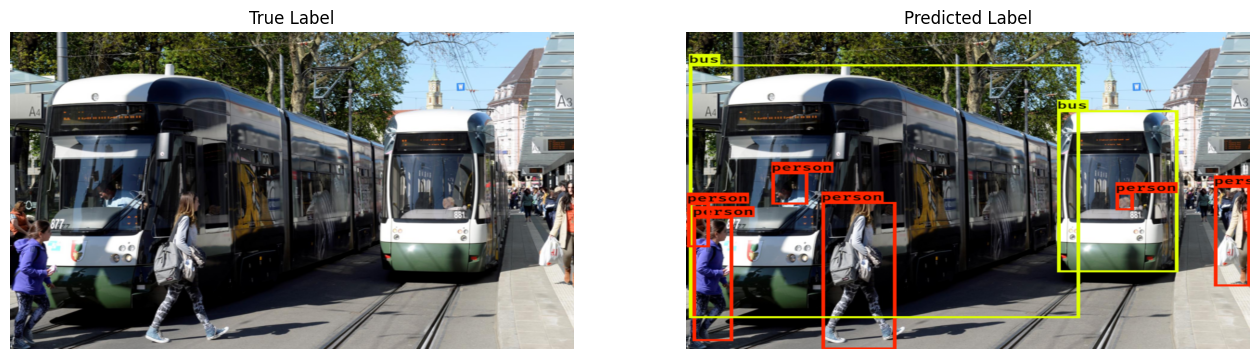

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
for i in range(2):
    ax[i].axis('off')
    ax[i].imshow(imgs[i])
    ax[i].set_title(img_classes[i])
plt.show()

#### Using the dictionary generate by the prediction to see all classes include in the predicted image

In [53]:
data_frame = pd.DataFrame(df)
data_frame.rename(columns={'label':'classes'}, inplace=True)
data_frame['label'] = [1 for i in range(len(data_frame.iloc[:, 0]))]


#### Classes countplot

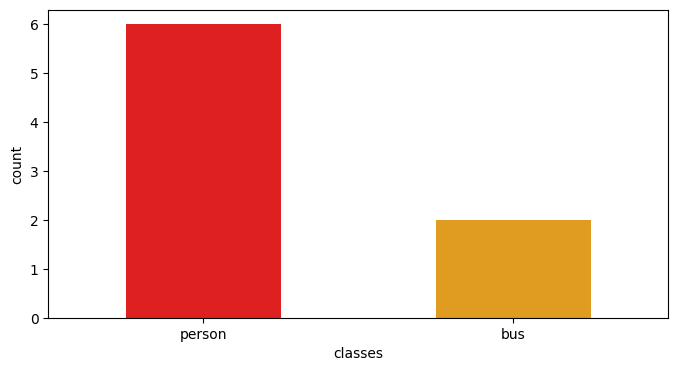

In [78]:
plt.figure(figsize=(8,4))
sns.countplot(data=data_frame, x='classes', palette=['red', 'orange'], hue='classes', width=0.5)
plt.show()

#### Data Frame created wih : 

* classes
* the score of prediction
* bonding boxes 
* the encoded classses

In [80]:
display(data_frame.tail())

,classes,score,top,left,bottom,right,label
3,person,0.60,269,92,330,131,1
4,bus,0.51,150,400,460,530,1
5,person,0.47,295,569,487,608,1
6,person,0.35,328,1,412,25,1
7,person,0.33,308,463,341,482,1
